Median and Average Hourly Wages in the USA (1973-2022)


**Introduction:**

In the medical industry, the ability to predict and prevent diseases plays a crucial role in improving any patients' health. By looking at the patterns from the past we can be prepared to take any necessary action to insure that a patient can recover well from a disease and what precautions they should take in the future in order to remain healthy. One such critical area is early detection of diabetes, a chronic metabolic disorder affecting millions worldwide. Luckily, with advancements in data science we can easily predict whether a person has diabetes or not by employing the methods of classification. A model like this will not only contribute to the growing field of predictive medicine but also enhance the concept of preventive healthcare practices which can help improve the  lives of millions who are susceptible to diabetes.

Using this existing data set, we will create a classification model to predict if an adult female of Pima Indian heritage has diabetes by looking at the factors:
1.Glucose Levels
2.Insulin
3.Blood Pressure 
4.BMI.

The data set used is taken from The National Institute of Diabetes and Digestive and Kidney Diseases. All the patients listed in this database are females over the age of 21 and of Pima Indian heritage. This data set consists of several medical predictor (independent) variables and one target (dependent) variable, Outcome. They have modeled the outcome on two class variables  0 (does not have diabetes) and 1 (has diabetes). 


**Preliminary exploratory data analysis:**

Demonstrate that the dataset can be read from the web into R 

Clean and wrangle your data into a tidy format

Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [30]:
library(repr)
library(tidyverse)
library(tidymodels)
library(corrplot)
options(repr.matrix.max.rows = 6)

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [33]:
diabetes <- read_csv("https://raw.githubusercontent.com/asnbl/dsci-100-2023-24W-group-16/main/diabetes.csv") 
diabetes_outcome <- diabetes |>
  mutate(Outcome = as_factor(Outcome)) |>
  mutate(Outcome = fct_recode(Outcome, "1" = "Has Diabetes", "0" = "Does not have Diabetes"))
diabetes_outcome

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Outcome = fct_recode(Outcome, `1` = "Has Diabetes", `0` = "Does
  not have Diabetes")`.
Caused by warning:
! Unknown levels in `f`: Has Diabetes, Does not have Diabetes”


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


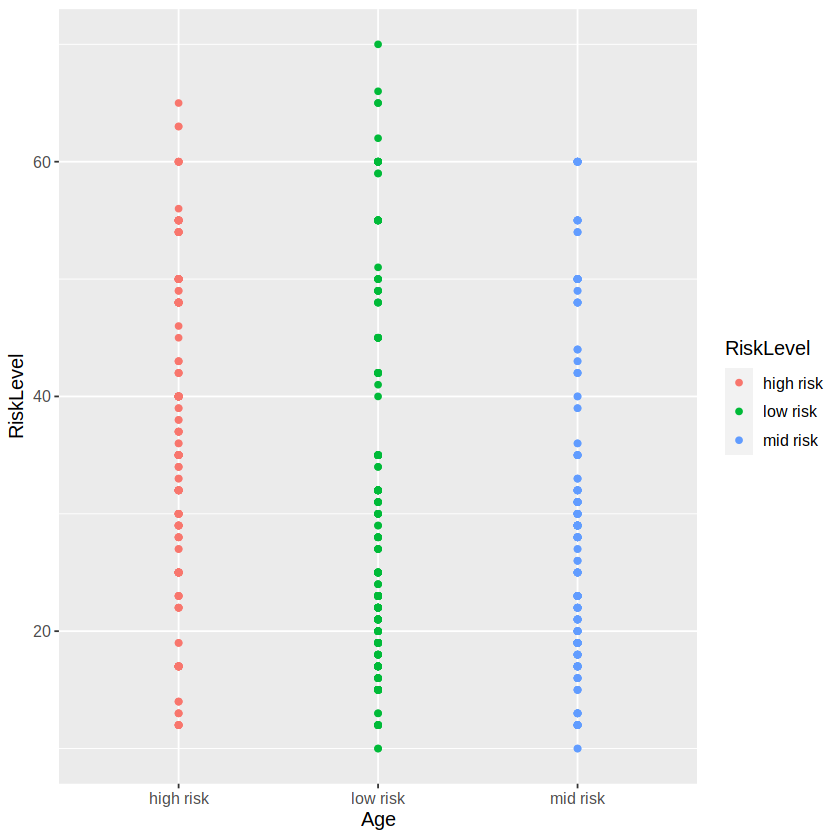

In [54]:
plot <- bhbh |>
    ggplot(aes(x = RiskLevel, y = Age, color = RiskLevel)) +
    geom_point() +
    xlab("Age") +
    ylab("RiskLevel") +
    theme(text = element_text(size = 12))
plot

**Methods:**

Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

Describe at least one way that you will visualize the results


**Expected outcomes and significance:**

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?